In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1. Color-Based Features
(a) RGB Histogram

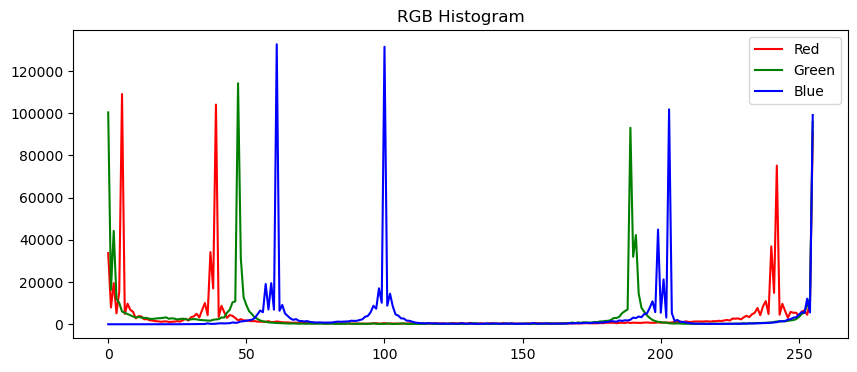

In [2]:
# Load image
image = cv2.imread("Image Classify.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Compute histograms
hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

# Ploting
plt.figure(figsize=(10, 4))
plt.title("RGB Histogram")
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')
plt.legend()
plt.show()

(b) Dominant Colors (K-Means Clustering)

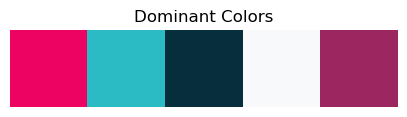

In [3]:
from sklearn.cluster import KMeans

pixels = image_rgb.reshape(-1, 3)
# Apply K-Means (e.g., 5 dominant colors)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pixels)
dominant_colors = kmeans.cluster_centers_.astype(int)
#ploating
plt.figure(figsize=(5, 2))
plt.title("Dominant Colors")
plt.imshow([dominant_colors])
plt.axis('off')
plt.show()

2. Texture Features
(a) GLCM (Gray-Level Co-occurrence Matrix)

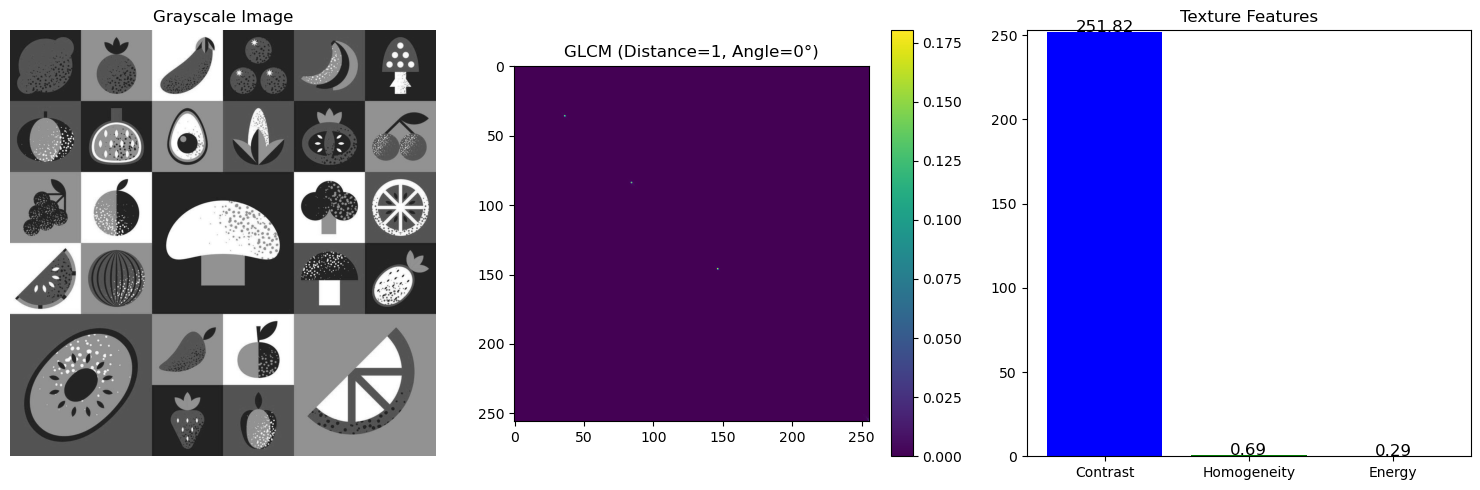

In [4]:
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread("Image Classify.jpg")  

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

contrast = graycoprops(glcm, 'contrast')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(glcm[:, :, 0, 0], cmap='viridis')
plt.title('GLCM (Distance=1, Angle=0°)')
plt.colorbar()

#  Plot the texture properties
plt.subplot(1, 3, 3)
features = ['Contrast', 'Homogeneity', 'Energy']
values = [contrast, homogeneity, energy]

plt.bar(features, values, color=['blue', 'green', 'orange'])
plt.title('Texture Features')
plt.ylim(0, max(values) + 1)
for i, v in enumerate(values):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

(b) LBP (Local Binary Patterns)

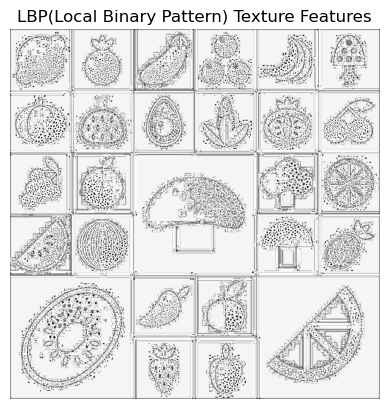

In [5]:
from skimage.feature import local_binary_pattern

# Compute LBP
radius = 3
n_points = 8 * radius
lbp = local_binary_pattern(gray, n_points, radius, method='uniform')

# Plot
plt.imshow(lbp, cmap='gray')
plt.title("LBP(Local Binary Pattern) Texture Features")
plt.axis('off')
plt.show()

3. Shape & Edge Features
(a) Canny Edge Detection

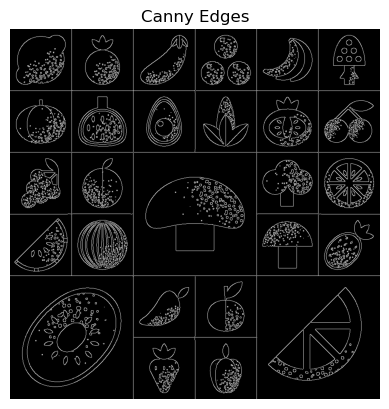

In [6]:
edges = cv2.Canny(gray, 100, 200)

plt.imshow(edges, cmap='gray')
plt.title("Canny Edges")
plt.axis('off')
plt.show()

(b) Hu Moments (Shape Descriptors)

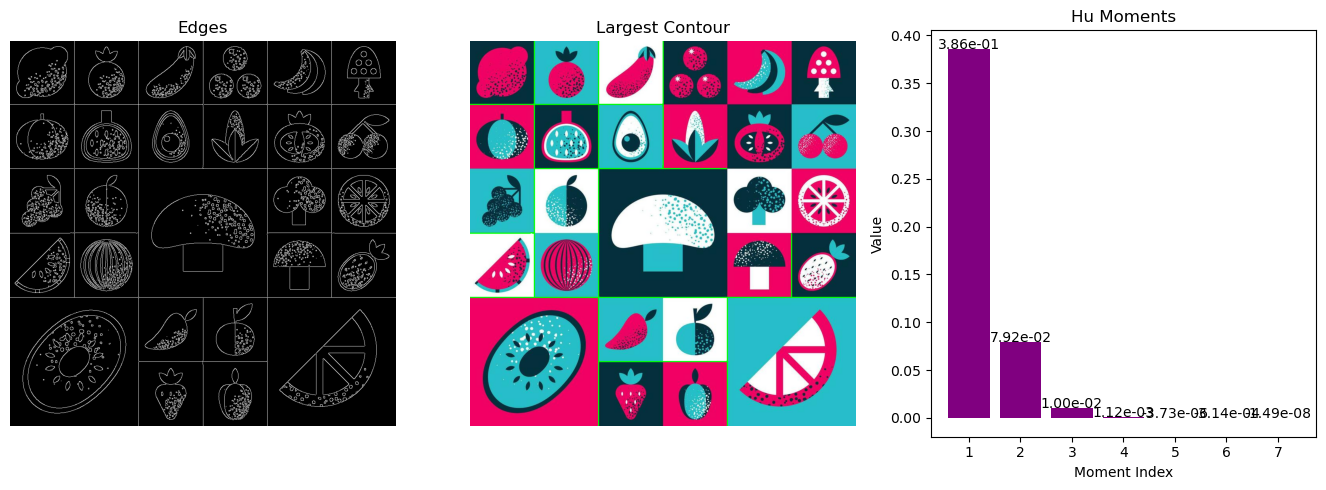

In [7]:
image = cv2.imread("Image Classify.jpg") 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the largest contour
cnt = max(contours, key=cv2.contourArea)

# Compute Hu Moments
hu_moments = cv2.HuMoments(cv2.moments(cnt)).flatten()

contour_img = image.copy()
cv2.drawContours(contour_img, [cnt], -1, (0, 255, 0), 2)

plt.figure(figsize=(18, 5))

plt.subplot(1, 4, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edges")
plt.axis("off")

# Image with Largest Contour
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title("Largest Contour")
plt.axis("off")

# Hu Moments Bar Chart
plt.subplot(1, 4, 4)
plt.bar(range(1, 8), hu_moments, color='purple')
plt.title("Hu Moments")
plt.xlabel("Moment Index")
plt.ylabel("Value")
for i, val in enumerate(hu_moments):
    plt.text(i + 1, val + 0.0001, f"{val:.2e}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

4. Keypoint & Local Features
(a) SIFT Features

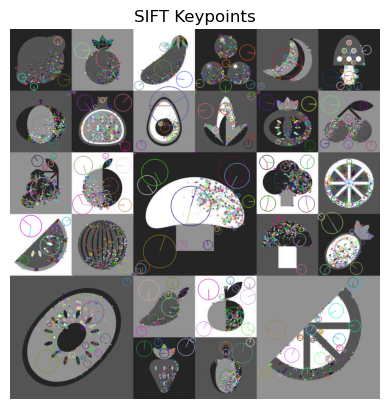

In [8]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw keypoints
img_sift = cv2.drawKeypoints(gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_sift)
plt.title("SIFT Keypoints")
plt.axis('off')
plt.show()

(b) ORB Features (Faster Alternative)

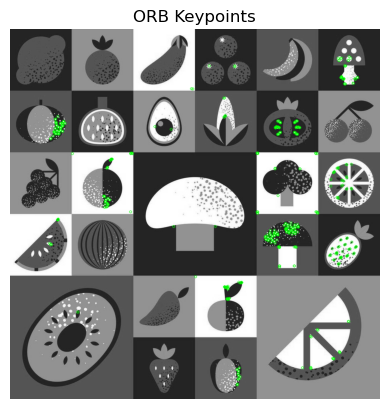

In [9]:
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(gray, None)

# Draw keypoints
img_orb = cv2.drawKeypoints(gray, keypoints, None, color=(0, 255, 0))
plt.imshow(img_orb)
plt.title("ORB Keypoints")
plt.axis('off')
plt.show()

5. Deep Learning Features
(a) VGG16 Feature Extraction

In [10]:
# Alternative Feature Extraction without TensorFlow
import cv2
import numpy as np
from skimage.feature import hog

def extract_features(image_path):
    # Read and resize image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    
    # Color Histogram Features
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_features = hist.flatten()
    
    # HOG Features
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hog_features = hog(gray, orientations=8, pixels_per_cell=(16, 16),
                      cells_per_block=(1, 1), visualize=False)
    
    #LBP Texture Features
    lbp = local_binary_pattern(gray, 24, 3, method='uniform')
    lbp_hist, _ = np.histogram(lbp, bins=256)
    
    # Combine all features
    all_features = np.hstack([color_features, hog_features, lbp_hist])
    return all_features

features = extract_features("Apple.jpg")
print("Extracted feature vector length:", len(features))

Extracted feature vector length: 2336


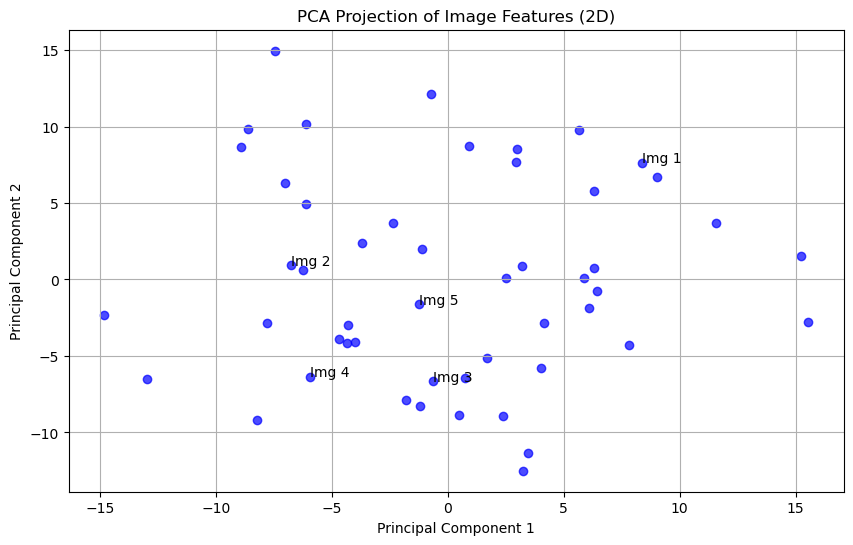

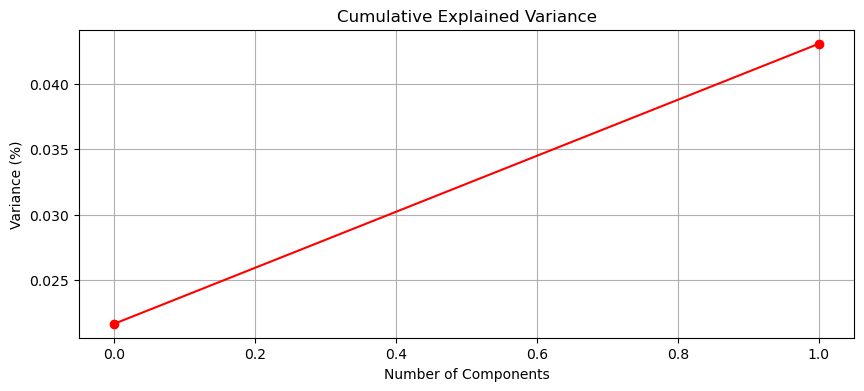

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(42)
n_images = 50
all_features = np.random.rand(n_images, 25088)  


pca = PCA(n_components=2) 
reduced_features = pca.fit_transform(all_features)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], alpha=0.7, c='blue')
plt.title("PCA Projection of Image Features (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

# Annotate sample points (optional)
for i in range(5): 
    plt.annotate(f'Img {i+1}', (reduced_features[i, 0], reduced_features[i, 1]))

plt.show()

# Cumulative explained variance
plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.grid(True)
plt.show()

(b) PCA for Dimensionality Reduction

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


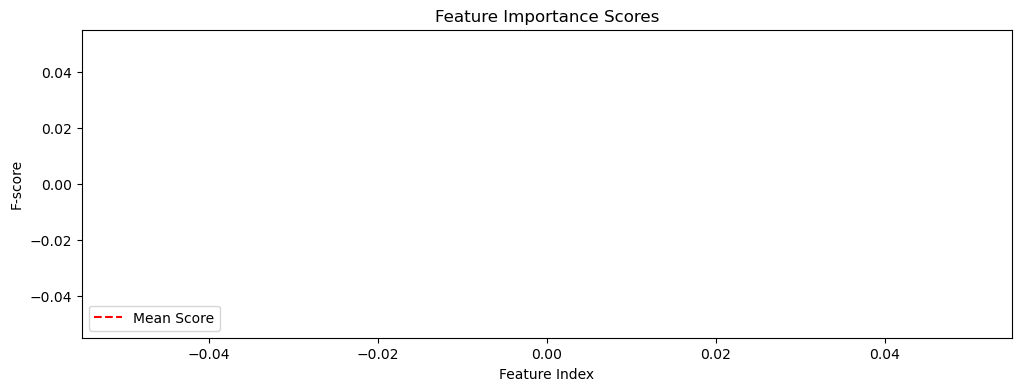

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt


single_image_features = np.random.rand(1, 25088)  


selector = SelectKBest(score_func=f_classif, k=50)
selected_features = selector.fit_transform(single_image_features, [0])  # Dummy target

# Plot feature scores (importance)
plt.figure(figsize=(12, 4))
plt.bar(range(len(selector.scores_)), selector.scores_, color='purple')
plt.title("Feature Importance Scores")
plt.xlabel("Feature Index")
plt.ylabel("F-score")
plt.axhline(y=np.mean(selector.scores_), color='r', linestyle='--', label='Mean Score')
plt.legend()
plt.show()

Fourier Transform (Frequency Domain Features)

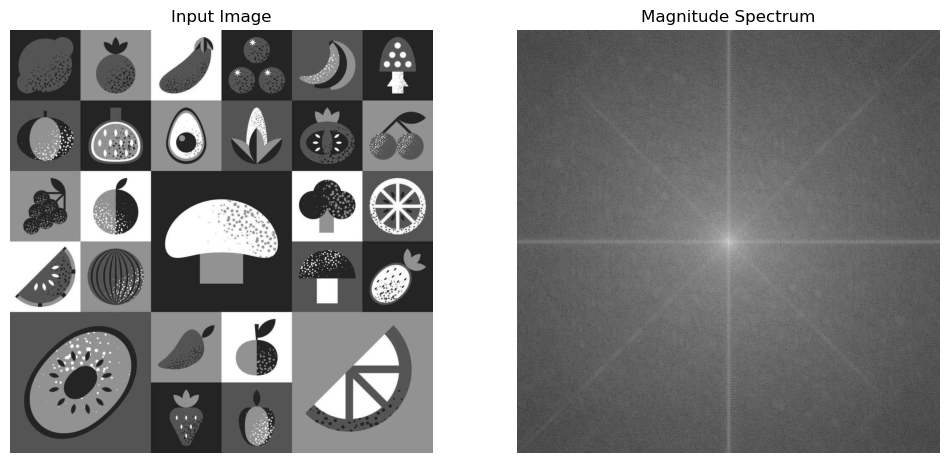

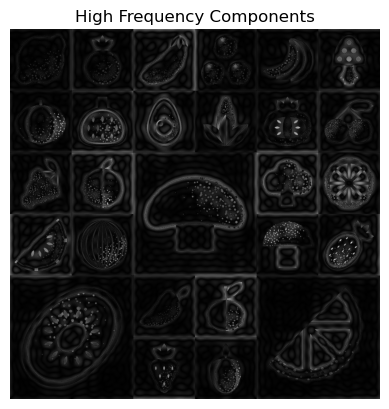

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("Image Classify.jpg", 0)


f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.axis('off')
plt.show()

# Extract dominant frequencies
rows, cols = img.shape
crow, ccol = rows//2, cols//2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0  # Remove low frequencies
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(img_back, cmap='gray')
plt.title('High Frequency Components'), plt.axis('off')
plt.show()